In [2]:
# important Libraries 
 
from keras.models import Sequential    # this for build the neural network architecture
from keras.layers import Dense , Conv2D , Flatten  # to create layers for our model 
from keras.datasets import mnist     # the dataset 
from tensorflow.keras.utils import to_categorical # to encode the data 
import matplotlib.pyplot as plt 
import numpy as np 


In [3]:
# train and test dataset 
(x_train , y_train) , (x_test , y_test) = mnist.load_data()

In [4]:
# get the image shape ( size ) 
print(x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
# get first image 
# its array of pixels values for the image 
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
# get the firs image lable 
# its number 5
y_train[0]

5

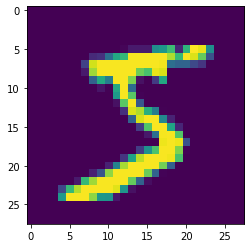

In [7]:
# display the image 
plt.imshow(x_train[0])

In [8]:
# reshape the data ( add the depth value for the image ) to fit the model 
x_train = x_train.reshape(60000 , 28 , 28 , 1)
x_test = x_test.reshape(10000 , 28 , 28 , 1)

In [9]:
# using one hot encoding 

y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# print the new lables 
print(y_train_one_hot[0])   # get the new lable for number 5 it return 1 for its position and 0 for other numbers 

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [19]:
model = Sequential()    # the architecture 


# add first conv layer to model 
# activation function is relu 
# input image size is 28 * 28 with depth equal to 1
model.add(Dense(64 , activation = 'relu' , input_shape = (28,28,1)))

# add second conv layer 
# there is no input_shape because its not the first layer 
model.add(Dense(32 , activation = 'relu'))

# add a flatten layer to set the image into 1d array 
model.add(Flatten())

# add the last layer 
# 10 is the neurons number for 10 different digits 
# activation function is softmax 
model.add(Dense(10 , activation='softmax'))

In [20]:
# compile the model 
model.compile(optimizer='adam' , loss= 'categorical_crossentropy' , metrics=['accuracy'])

In [21]:
hist = model.fit(x_train , y_train_one_hot , validation_data=(x_test , y_test_one_hot) , epochs=3)

Epoch 1/3
1875/1875 [==============================] - 115s 61ms/step - loss: 0.4165 - accuracy: 0.8911 - val_loss: 0.3438 - val_accuracy: 0.9107
Epoch 2/3
1875/1875 [==============================] - 119s 63ms/step - loss: 0.3183 - accuracy: 0.9129 - val_loss: 0.3436 - val_accuracy: 0.9124
Epoch 3/3
1875/1875 [==============================] - 113s 60ms/step - loss: 0.3036 - accuracy: 0.9179 - val_loss: 0.2842 - val_accuracy: 0.9220


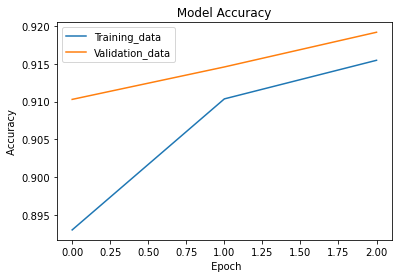

In [13]:
# visualize the model accuracy 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title(" Model Accuracy ")
plt.ylabel(' Accuracy ')
plt.xlabel(' Epoch')
plt.legend(['Training_data' , 'Validation_data'] , loc = 'upper left')
plt.show()

In [14]:
# get the prediction  probabilites for the first 4 images 
predict = model.predict(x_test[:4])     
predict

# this array contain 4 predictions for the first 4 images 
# every predict array contain 10 prob for each number 

array([[4.9166556e-06, 8.4201960e-12, 1.8075483e-06, 4.3152156e-03,
        9.4145253e-07, 2.0711266e-05, 4.7758287e-11, 9.9521375e-01,
        3.7515132e-05, 4.0500393e-04],
       [7.1018713e-04, 1.1277883e-05, 9.8115659e-01, 7.0174348e-05,
        4.2047773e-14, 9.3821976e-03, 8.4516155e-03, 1.6962035e-17,
        2.1804725e-04, 3.3386296e-13],
       [1.2480617e-06, 9.7579122e-01, 1.4752018e-02, 1.9118168e-03,
        1.5704728e-04, 6.2964327e-04, 1.5281842e-03, 1.7252046e-03,
        3.2833794e-03, 2.2026227e-04],
       [9.9993217e-01, 2.2152714e-11, 6.2268496e-06, 3.2573939e-07,
        6.9286252e-09, 4.4560229e-06, 5.0135473e-05, 4.1354310e-06,
        5.3192156e-07, 2.0178350e-06]], dtype=float32)

In [15]:
# simplify the predictions as a number lable 
print(np.argmax(predict , axis=1))    # this give us the max value , axis = 1 for the horizontal line 


# print the actual lables 
print(y_test[:4])


[7 2 1 0]
[7 2 1 0]


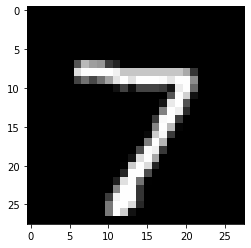

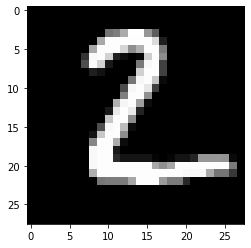

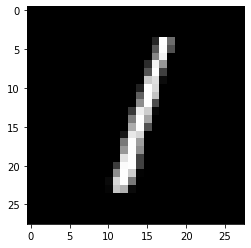

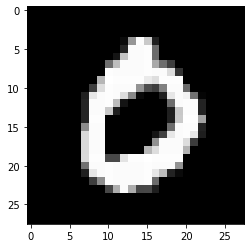

In [16]:
# display the first 4 images 
for i in range(0 , 4 ):
    image = x_test[i]  # get the image 
    image = np.array(image , dtype = 'float')    # convert it to array of pixels 
    pixels = image.reshape((28,28))            # reshape the image
    plt.imshow(pixels , cmap='gray')           # plot the image with black background 
    plt.show()

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 28, 28, 64)        128       
_________________________________________________________________
dense_1 (Dense)              (None, 28, 28, 32)        2080      
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                250890    
Total params: 253,098
Trainable params: 253,098
Non-trainable params: 0
_________________________________________________________________
